Part 1

A.




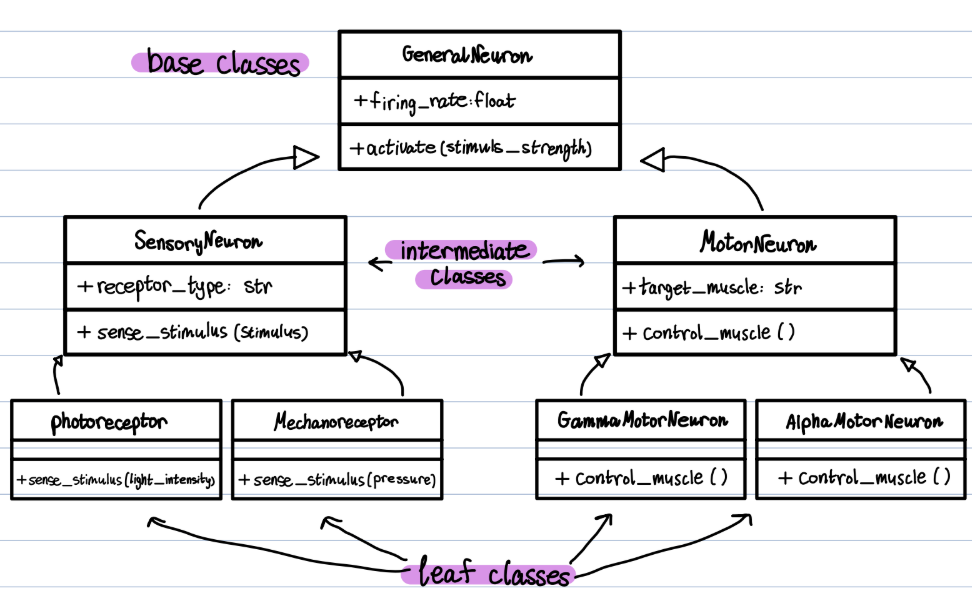

B.

General Neuron Class

In [6]:
class GeneralNeuron:
    def __init__(self, firing_rate=0):
        self.firing_rate = firing_rate
    
    def activate(self, stimulus_strength):
         pass

Class Sensory Neuron

In [7]:
class SensoryNeuron(GeneralNeuron):
    def __init__(self, firing_rate=0, receptor_type=None):
        super().__init__(firing_rate)
        self.receptor_type = receptor_type
    
    def sense_stimulus(self, stimulus):
        pass

class Motor Neuron

In [8]:
class MotorNeuron(GeneralNeuron):
    def __init__(self, firing_rate=0, target_muscle=None):
        super().__init__(firing_rate)
        self.target_muscle = target_muscle
    
    def control_muscle(self):
         pass

class Photoreceptor

In [9]:
class Photoreceptor(SensoryNeuron):
    def __init__(self, firing_rate=0):
        super().__init__(firing_rate, receptor_type="light")
    
    def sense_stimulus(self, light_intensity):
        pass

    def unique_light_response(self):
        pass

class Mechanoreceptor

In [10]:
class Mechanoreceptor(SensoryNeuron):
    def __init__(self, firing_rate=0):
        super().__init__(firing_rate, receptor_type="pressure")
    
    def sense_stimulus(self, pressure):
        pass

    def unique_pressure_response(self):
        pass

class Alpha Motor Neuron

In [11]:
class AlphaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate=0):
        super().__init__(firing_rate, target_muscle="skeletal muscle")
    
    def control_muscle(self):
        pass

    def control_skeleton_muscle(self):
        pass

Gamma Motor Neuron

In [12]:
class GammaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate=0):
        super().__init__(firing_rate, target_muscle="muscle spindle")
    
    def control_muscle(self):
        pass

    def control_spindle_muscle(self):
        pass

Part 2

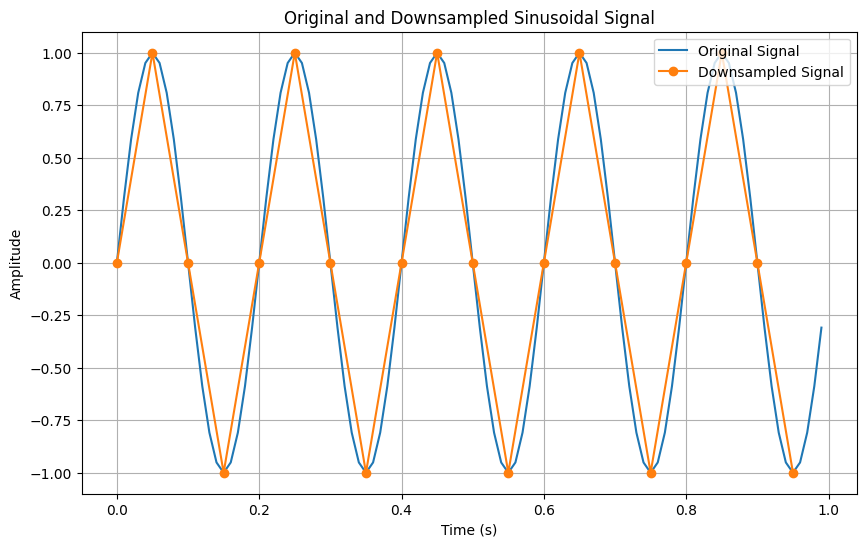

Original signal length: 100
Downsampled signal length: 20
Indices of downsampled points: [ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Q1: Function to downsample a sinusoidal signal
def downsample_signal(signal, sampling_interval):
    maxima_indices = np.argwhere((signal[1:-1] > signal[:-2]) & (signal[1:-1] > signal[2:])).flatten() + 1
    minima_indices = np.argwhere((signal[1:-1] < signal[:-2]) & (signal[1:-1] < signal[2:])).flatten() + 1
    key_indices = np.sort(np.unique(np.concatenate((maxima_indices, minima_indices))))
    
    downsampled_indices = np.arange(0, len(signal), sampling_interval)
    
    combined_indices = np.sort(np.unique(np.concatenate((key_indices, downsampled_indices))))
    downsampled_signal = signal[combined_indices]

    return downsampled_signal, combined_indices

# Generate the sinusoidal signal
fs = 100  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector
f = 5  # Frequency of the sinusoid (Hz)
signal = np.sin(2 * np.pi * f * t)

# Downsample the signal
sampling_interval = 5
downsampled_signal, indices = downsample_signal(signal, sampling_interval)

# Plot original and downsampled signals
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label="Original Signal")
plt.plot(t[indices], downsampled_signal, 'o-', label="Downsampled Signal")
plt.title("Original and Downsampled Sinusoidal Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

# Verification
print(f"Original signal length: {len(signal)}")
print(f"Downsampled signal length: {len(downsampled_signal)}")
print(f"Indices of downsampled points: {indices}")


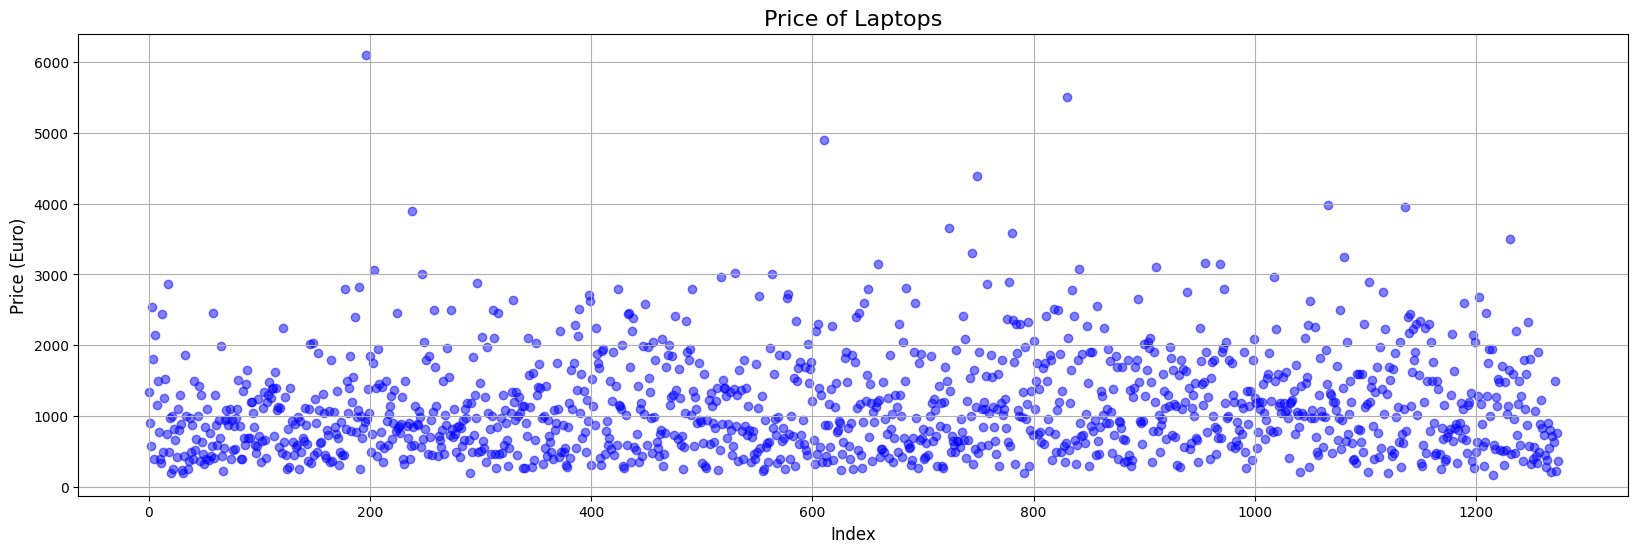

In [5]:
# Load the dataset
file_path = 'laptop_price - dataset.csv' 
df = pd.read_csv(file_path) 

# Plot the price of all laptops
plt.figure(figsize=(20, 6))
plt.scatter(df.index, df['Price (Euro)'], color='blue', alpha=0.5)
plt.title('Price of Laptops', fontsize=16)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Price (Euro)', fontsize=12)
plt.grid(True)
plt.show()


In [6]:
# Group the data by 'Company' and calculate the average price for each company
average_price_by_company = df.groupby('Company')['Price (Euro)'].mean()

# Find the company with the most expensive average laptop
most_expensive_company = average_price_by_company.idxmax()
most_expensive_price = average_price_by_company.max()

# Display the average prices for each company
print("Average laptop prices by company:")
print(average_price_by_company)

# Display the company with the most expensive average laptop
print(f"\nThe company with the most expensive average laptop is {most_expensive_company} with an average price of {most_expensive_price:.2f} Euros.")


Average laptop prices by company:
Company
Acer          633.464455
Apple        1564.198571
Asus         1123.829737
Chuwi         314.296667
Dell         1199.225120
Fujitsu       729.000000
Google       1677.666667
HP           1080.314664
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price (Euro), dtype: float64

The company with the most expensive average laptop is Razer with an average price of 3346.14 Euros.


In [11]:
# Standardize the 'OpSys' column by cleaning and replacing OS names
df['OpSys'] = df['OpSys'].str.lower().str.strip()  # Convert to lowercase and remove extra spaces
df['OpSys'] = df['OpSys'].replace({
    "mac": "Mac",
    "mac os x": "Mac",
    "macos": "Mac",
    "windows 10 s": "Windows",
    "windows": "Windows",
    "windows 10": "Windows",
    "windows 7": "Windows",
    "no os": "No OS",
    "linux": "Linux",
    "android": "Android",
    "chrome os": "Chrome OS"
})

# Extract unique operating systems
unique_os = df['OpSys'].unique()

# Print unique operating systems
print("Unique Operating Systems in the dataset:")
print(unique_os)


Unique Operating Systems in the dataset:
['Mac' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']


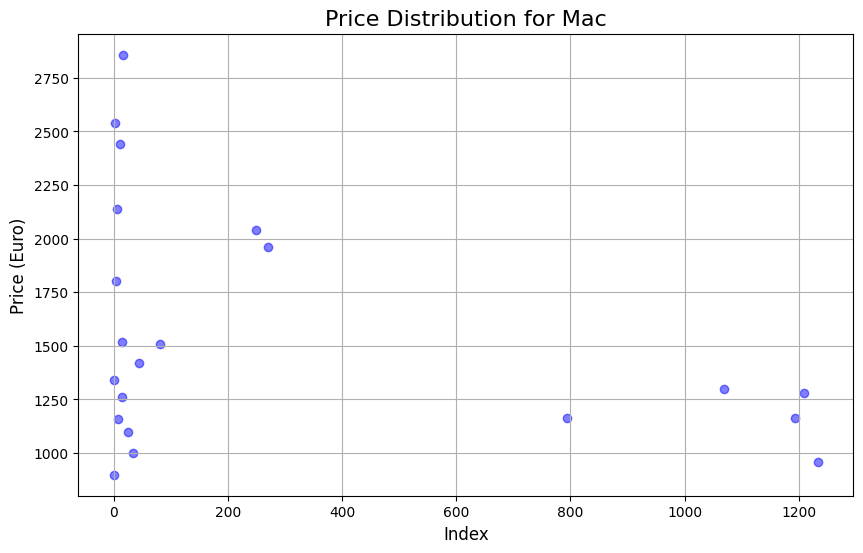

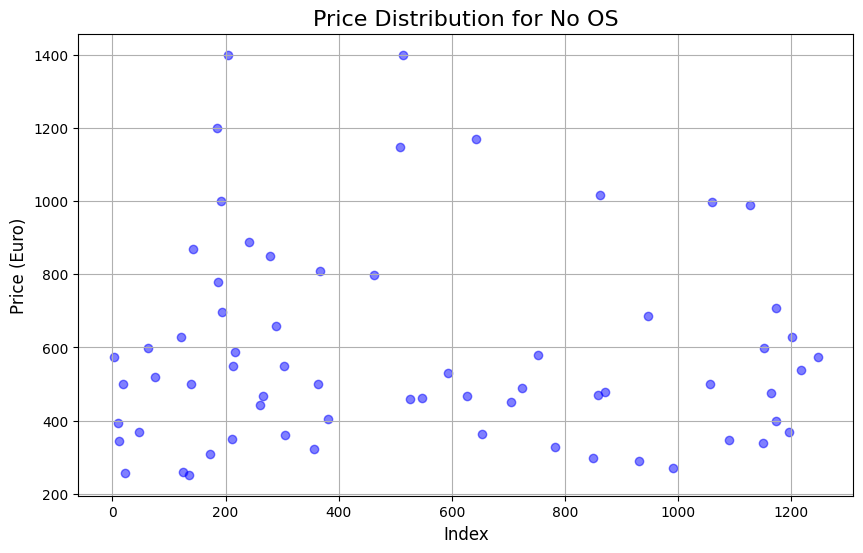

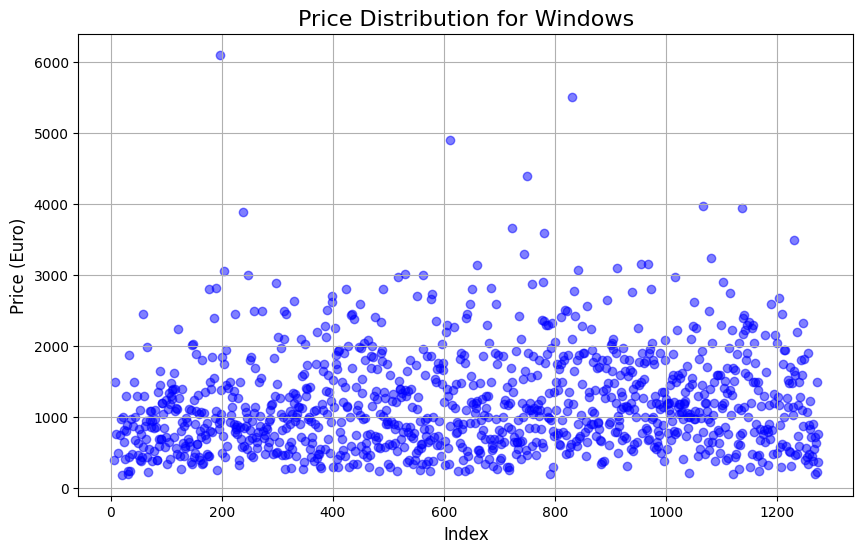

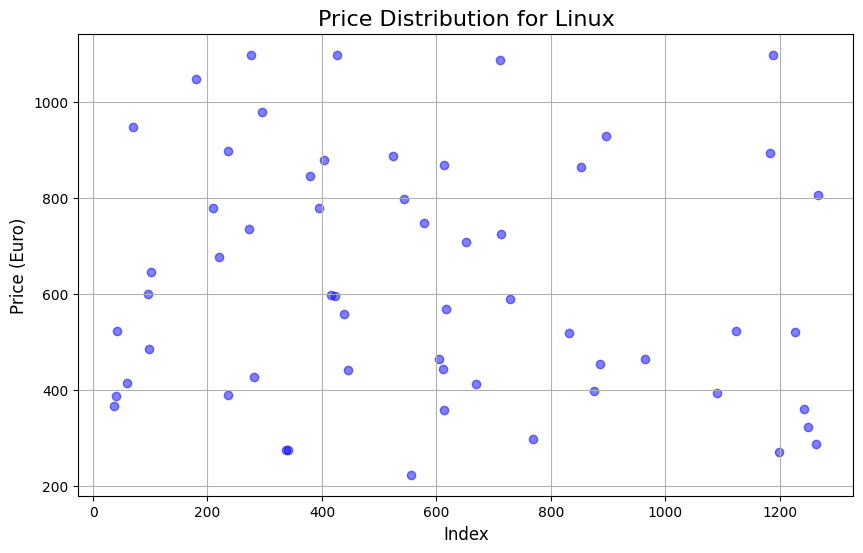

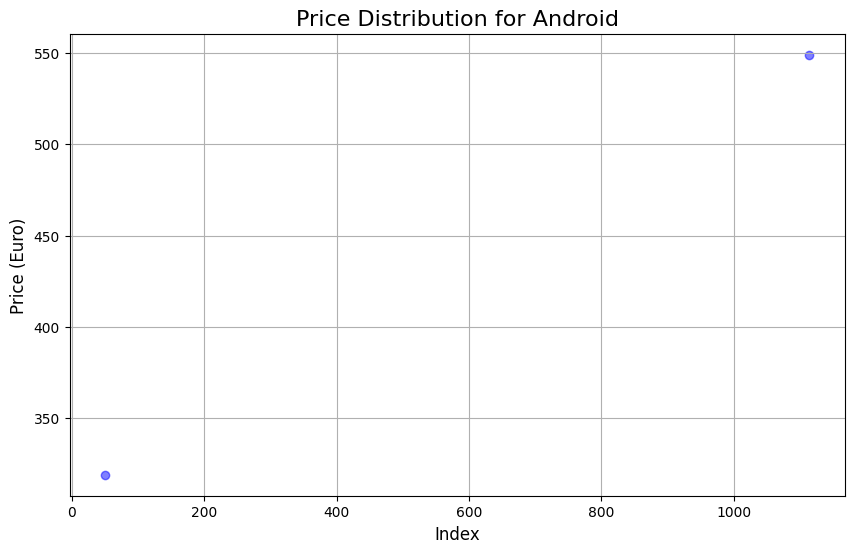

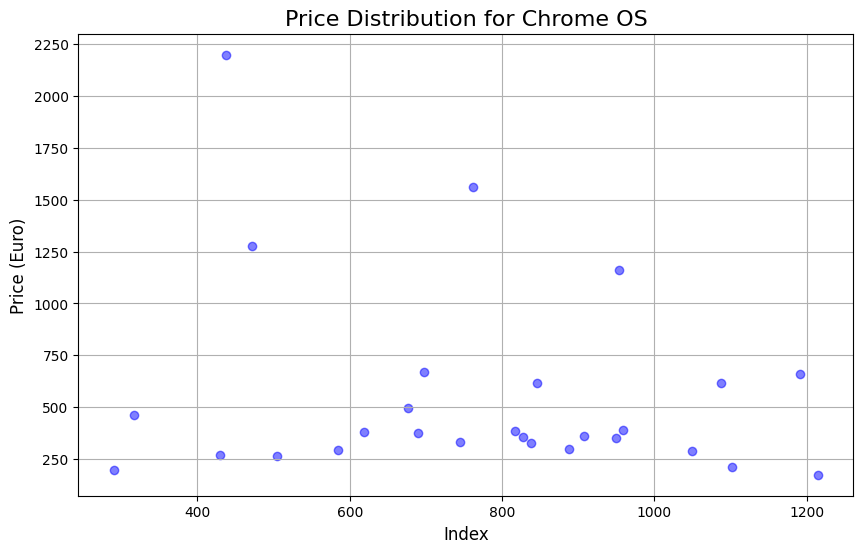

In [12]:
# Plot the price distribution for each OS using a scatter plot, separately for each unique OS
for os in unique_os:
    os_data = df[df['OpSys'] == os]  # Filter the data for each operating system
    
    # Create a new figure for each OS
    plt.figure(figsize=(10, 6))
    plt.scatter(os_data.index, os_data['Price (Euro)'], color='blue', alpha=0.5)
    plt.title(f"Price Distribution for {os}", fontsize=16)
    plt.xlabel("Index", fontsize=12)
    plt.ylabel("Price (Euro)", fontsize=12)
    plt.grid(True)
    
    # Show the plot for the current OS
    plt.show()


As RAM increases, the price tends to increase.


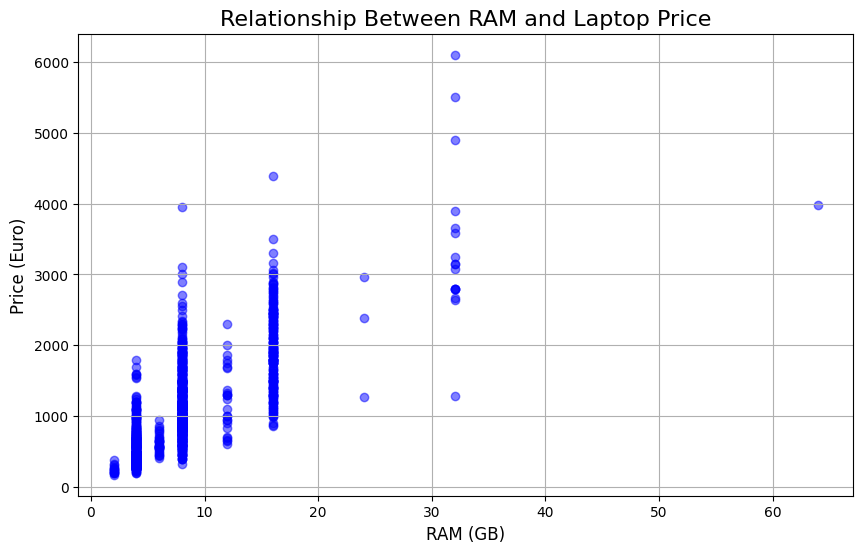

In [58]:
# Check if 'RAM (GB)' is not numeric, and convert it to numeric if necessary
df['RAM (GB)'] = pd.to_numeric(df['RAM (GB)'], errors='coerce')

# Create a scatter plot to show the relationship between RAM and Price
plt.figure(figsize=(10, 6))
plt.scatter(df['RAM (GB)'], df['Price (Euro)'], color='blue', alpha=0.5)
plt.title('Relationship Between RAM and Laptop Price', fontsize=16)
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Price (Euro)', fontsize=12)
plt.grid(True)

# Add the statement as a text annotation on the plot
print('As RAM increases, the price tends to increase.')
plt.show()


In [15]:
# Extract the storage type by splitting the "Memory" column after the first word
df['Storage type'] = df['Memory'].apply(lambda x: ' '.join(x.split()[1:2]))

# Display the unique storage types
storage_types = df['Storage type'].unique()
print(storage_types)

['SSD' 'Flash' 'HDD' 'Hybrid']


Bonus Question 1:

I choose to go for this question to check if there is a connection between weight and price.


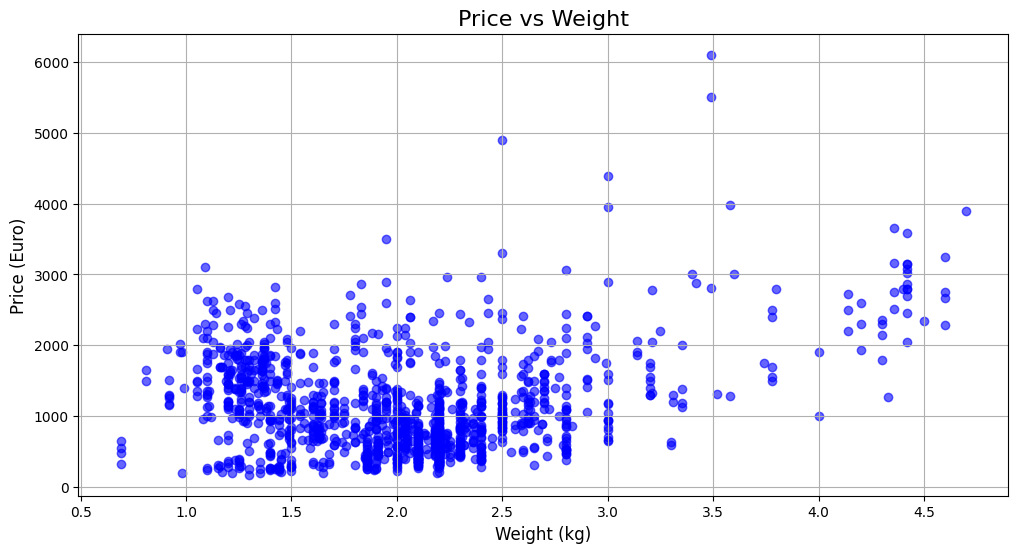

After viewing the graph, we can conclude that there is no clear connection between weight and price.


In [23]:
# Create a scatter plot using Matplotlib
plt.figure(figsize=(12, 6))
plt.scatter(x=df['Weight (kg)'], y=df['Price (Euro)'], color='blue', alpha=0.6)

plt.title('Price vs Weight', fontsize=16)
plt.xlabel('Weight (kg)', fontsize=12)
plt.ylabel('Price (Euro)', fontsize=12)
plt.grid(True)

plt.show()

print('After viewing the graph, we can conclude that there is no clear connection between weight and price.')


Bonus Question 2:

I choose to go for this question to check the distribution of RAM for Mac and Windows.


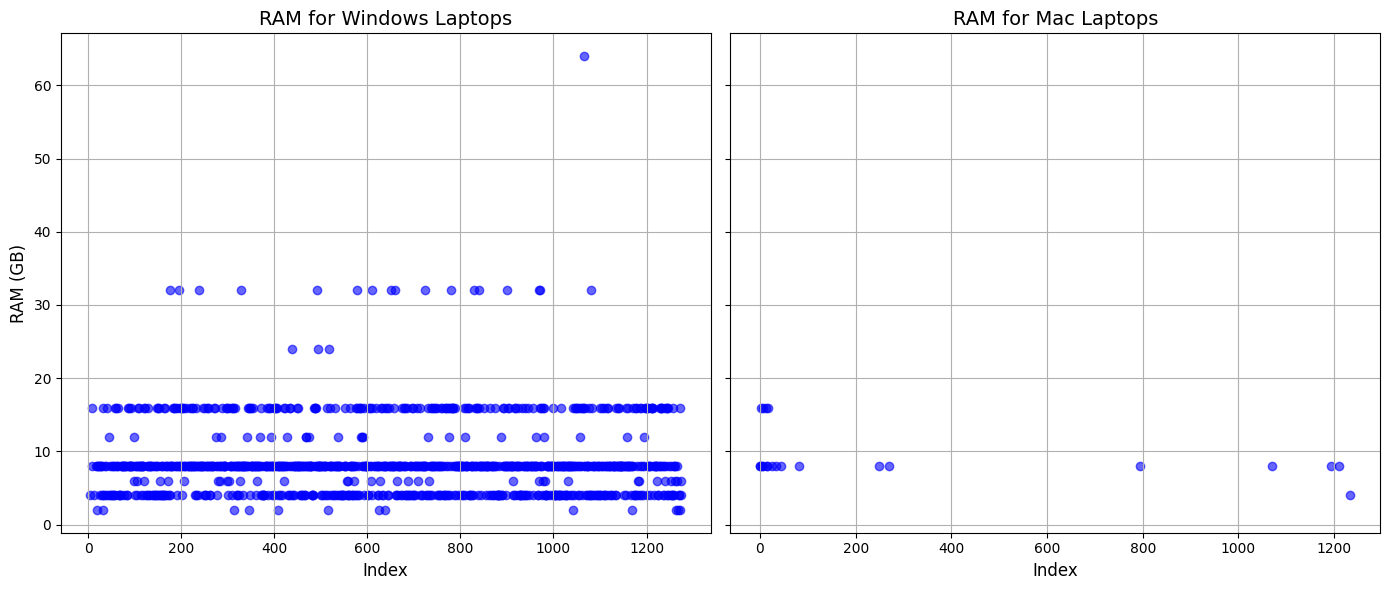

After viewing the graph, we can conclude that there is no clear connection between OS to RAM size


In [24]:
# Filter the dataset to include only laptops with 'Windows' and 'Mac' operating systems
windows_mac_df = df[df['OpSys'].isin(['Windows', 'Mac'])]

# Separate Windows and Mac data
windows_data = windows_mac_df[windows_mac_df['OpSys'] == 'Windows']
mac_data = windows_mac_df[windows_mac_df['OpSys'] == 'Mac']

# Create a figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)  # Share Y-axis for easy comparison

# Plot for Windows laptops
ax[0].scatter(windows_data.index, windows_data['RAM (GB)'], color='blue', alpha=0.6)
ax[0].set_title('RAM for Windows Laptops', fontsize=14)
ax[0].set_xlabel('Index', fontsize=12)
ax[0].set_ylabel('RAM (GB)', fontsize=12)
ax[0].grid(True)

# Plot for Mac laptops
ax[1].scatter(mac_data.index, mac_data['RAM (GB)'], color='blue', alpha=0.6)
ax[1].set_title('RAM for Mac Laptops', fontsize=14)
ax[1].set_xlabel('Index', fontsize=12)
ax[1].grid(True)

# Adjust layout for better appearance
plt.tight_layout()

# Show the plots
plt.show()

print('After viewing the graph, we can conclude that there is no clear connection between OS to RAM size')

